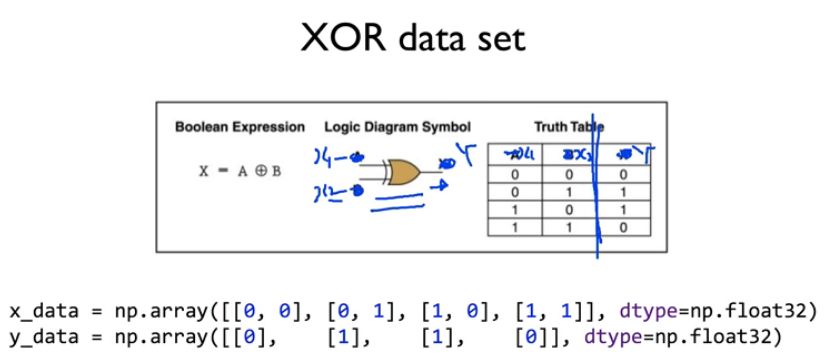

In [ ]:
### NN을 사용하지 않은 경우 ###

# Lab 9 XOR
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

# 위의 진리표 상의 X, Y 데이터를 
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)
# y는 0 또는 1이므로 Logistic Regression을 사용하면 된다.

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
# 들어갈 때(in) 2개, 나올 때(out) 1개
b = tf.Variable(tf.random_normal([1]), name='bias') # out의 수와 같음

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run(W))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

'''
Hypothesis:  [[ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]]
Correct:  [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
Accuracy:  0.5
'''


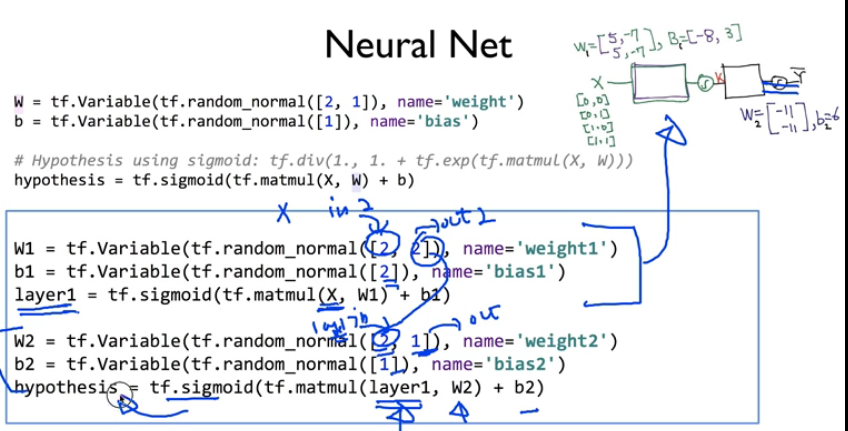

In [ ]:
### Layer 1,2로 NN을 사용한 경우 ###

# Lab 9 XOR
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

# 입력은 X1, X2 노드였으므로 2개가 된다. 출력은 마찬가지로 2
# 출력은 여기에서 정하면 된다.
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
# 바이어스도 출력과 따라서 2가 된다.
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# 레이어1의 출력을 이어받아 입력은 2가 된다. 출력은 1이 된다. (최종)
W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
# 바이어스도 출력에 따라 1이 된다.
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
# 시그모이드로 돌이게 된다. (최종 Y햇 구함)
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
# 레이어1의 값이 연결이 된다.
# hypothesis 는 출력, Y햇이라고 할 수 있다.

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


'''
Hypothesis:  [[ 0.01338218]
 [ 0.98166394]
 [ 0.98809403]
 [ 0.01135799]]
Correct:  [[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]
Accuracy:  1.0
'''


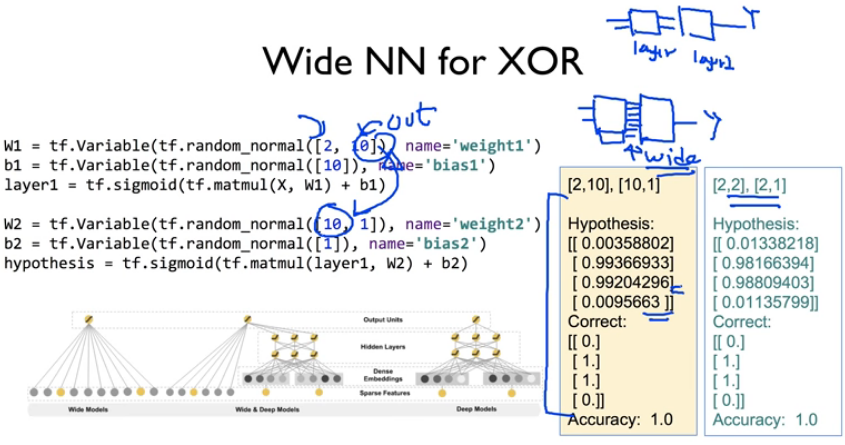

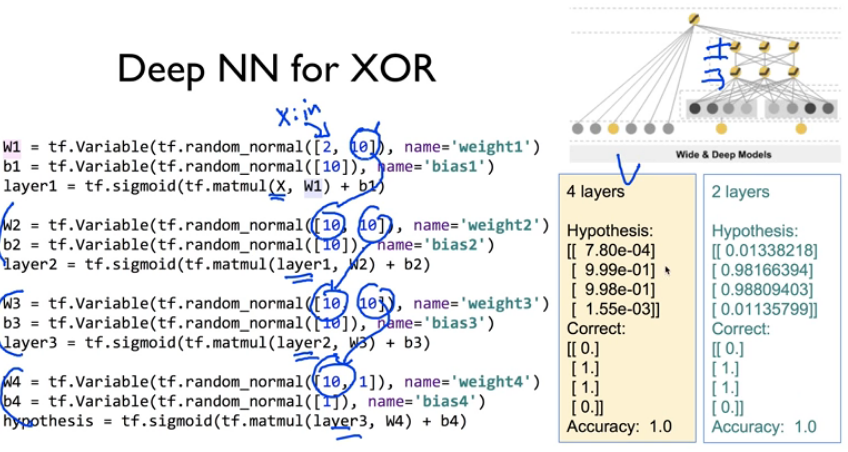

In [ ]:
### Wide NN으로 넓게 펼칠 경우의 NN ###
# 작은 값은 더 작게, 큰 값은 더 크게 나타나여 모델의 성능이 더 좋아졌다.

## Deep NN으로 깊게 만든 NN ###
# 이렇게 해서 딥 러닝이라는 말이 나왔다.

# Lab 9 XOR
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

# 이 부분에서 출력값을 높은 숫자를 주면 넓게 퍼지는 것과 같다.
W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([10, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


'''
Hypothesis:  [[  7.80511764e-04]
 [  9.99238133e-01]
 [  9.98379230e-01]
 [  1.55659032e-03]]
Correct:  [[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]
Accuracy:  1.0
'''


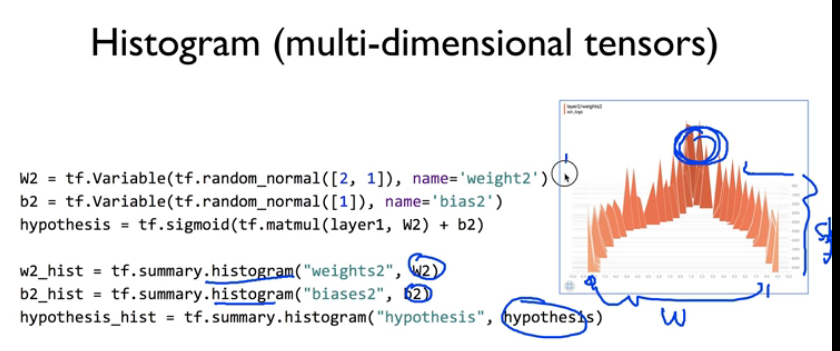

In [1]:
# Lab 9 XOR
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.01

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

# tf.name_scope 로 텐서들을 정리할 수 있다.
# layer1,2... 를 따로 보기 쉽게 나눌 수 있다.
with tf.name_scope("layer1") as scope:
    W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
    b1 = tf.Variable(tf.random_normal([2]), name='bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    w1_hist = tf.summary.histogram("weights1", W1)
    b1_hist = tf.summary.histogram("biases1", b1)
    layer1_hist = tf.summary.histogram("layer1", layer1)


with tf.name_scope("layer2") as scope:
    W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
    b2 = tf.Variable(tf.random_normal([1]), name='bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    w2_hist = tf.summary.histogram("weights2", W2)
    b2_hist = tf.summary.histogram("biases2", b2)
    hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

# cost/loss function
with tf.name_scope("cost") as scope:
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                           tf.log(1 - hypothesis))
    cost_summ = tf.summary.scalar("cost", cost)

with tf.name_scope("train") as scope:
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
accuracy_summ = tf.summary.scalar("accuracy", accuracy)

# Launch graph
with tf.Session() as sess:
    # tensorboard --logdir=./logs/xor_logs
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs/xor_logs_r0_01")
    writer.add_graph(sess.graph)  # Show the graph

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        summary, _ = sess.run([merged_summary, train], feed_dict={X: x_data, Y: y_data})
        writer.add_summary(summary, global_step=step)
        # 그래프가 step에 따라서 점점 그려지게 된다.

        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

    
'''
Hypothesis:  [[  6.13103184e-05]
 [  9.99936938e-01]
 [  9.99950767e-01]
 [  5.97514772e-05]]
Correct:  [[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]
Accuracy:  1.0
'''


0 0.715638 [array([[ 0.79269588,  0.68861037],
       [-1.20728338, -0.29517072]], dtype=float32), array([[ 1.7177    ],
       [ 0.35572484]], dtype=float32)]
100 0.690733 [array([[ 0.32268226, -0.23303092],
       [-0.77434134,  0.8052941 ]], dtype=float32), array([[ 1.46081138],
       [ 0.78415191]], dtype=float32)]
200 0.495032 [array([[ 1.67216849, -2.32165504],
       [-2.21686292,  2.65614724]], dtype=float32), array([[ 2.82439065],
       [ 2.60258079]], dtype=float32)]
300 0.223746 [array([[ 3.18776274, -3.74428844],
       [-3.69724274,  4.12956715]], dtype=float32), array([[ 4.70040751],
       [ 4.31880617]], dtype=float32)]
400 0.122295 [array([[ 3.98867249, -4.52083397],
       [-4.48413992,  4.90343571]], dtype=float32), array([[ 5.8487258],
       [ 5.4189949]], dtype=float32)]
500 0.0788432 [array([[ 4.48614597, -5.01518726],
       [-4.97325039,  5.39077044]], dtype=float32), array([[ 6.64474821],
       [ 6.20202589]], dtype=float32)]
600 0.0559812 [array([[ 4.83938

5000 0.000789405 [array([[ 7.84969902, -8.45132446],
       [-8.30820179,  8.76673508]], dtype=float32), array([[ 15.14112663],
       [ 14.76316166]], dtype=float32)]
5100 0.000746024 [array([[ 7.87877464, -8.48109531],
       [-8.33723068,  8.79612732]], dtype=float32), array([[ 15.24907398],
       [ 14.87186337]], dtype=float32)]
5200 0.000705329 [array([[ 7.90747595, -8.51048279],
       [-8.3658886 ,  8.82514381]], dtype=float32), array([[ 15.35638905],
       [ 14.97991753]], dtype=float32)]
5300 0.000667051 [array([[ 7.93581915, -8.53950214],
       [-8.39418983,  8.85379791]], dtype=float32), array([[ 15.46310902],
       [ 15.0873661 ]], dtype=float32)]
5400 0.000631071 [array([[ 7.96382046, -8.56816483],
       [-8.42215729,  8.88210297]], dtype=float32), array([[ 15.5692749 ],
       [ 15.19424152]], dtype=float32)]
5500 0.000597195 [array([[ 7.99149323, -8.59649181],
       [-8.44979191,  8.91008091]], dtype=float32), array([[ 15.67490768],
       [ 15.30058098]], dtype=fl

9900 6.13649e-05 [array([[ 9.00449085, -9.63154984],
       [-9.46273232,  9.93393517]], dtype=float32), array([[ 20.07340431],
       [ 19.72282982]], dtype=float32)]
10000 5.83398e-05 [array([[ 9.02439308, -9.65184593],
       [-9.48265171,  9.95403957]], dtype=float32), array([[ 20.17106056],
       [ 19.82086754]], dtype=float32)]

Hypothesis:  [[  6.13103184e-05]
 [  9.99936938e-01]
 [  9.99950767e-01]
 [  5.97514772e-05]] 
Correct:  [[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]] 
Accuracy:  1.0


'\nHypothesis:  [[  6.13103184e-05]\n [  9.99936938e-01]\n [  9.99950767e-01]\n [  5.97514772e-05]]\nCorrect:  [[ 0.]\n [ 1.]\n [ 1.]\n [ 0.]]\nAccuracy:  1.0\n'

### TENSORBOARD 실행
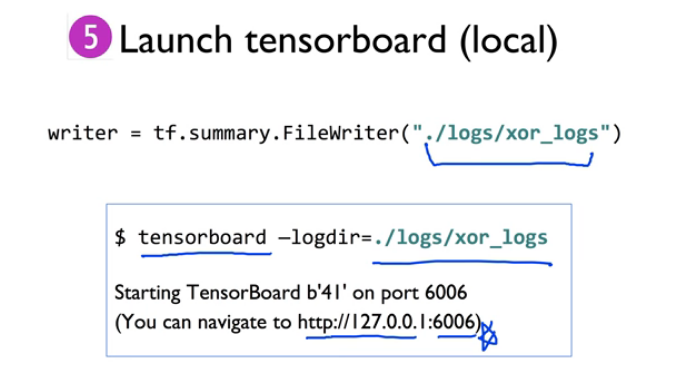

#### REMOTE 서버를 포트 포워딩으로 firewall 관련없이 ssh로 보는 방법
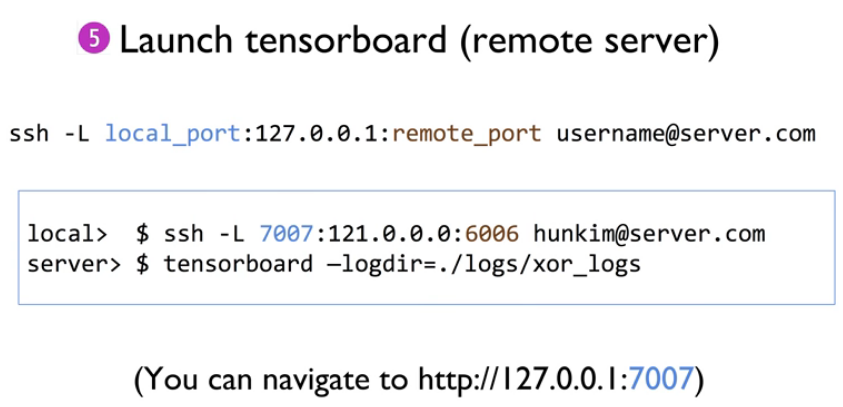

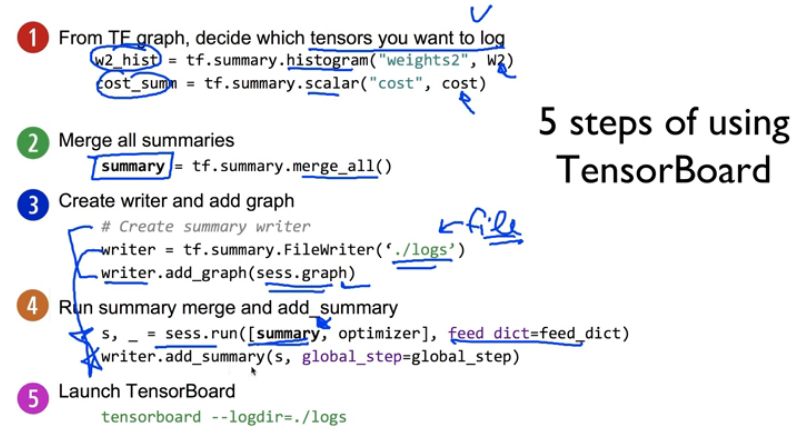

#### 여러개의 그래프를 동시에 보는 방법
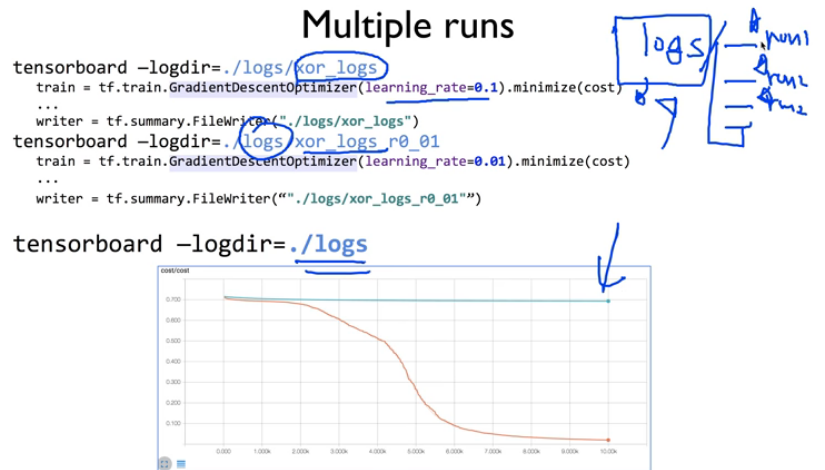

In [ ]:
# http://blog.aloni.org/posts/backprop-with-tensorflow/
# https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b#.b3rvzhx89
# WIP
import tensorflow as tf

tf.set_random_seed(777)  # reproducibility

# tf Graph Input
x_data = [[1.],
          [2.],
          [3.]]
y_data = [[1.],
          [2.],
          [3.]]


# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 1])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# Set wrong model weights
W = tf.Variable(tf.truncated_normal([1, 1]))
b = tf.Variable(5.)

# Forward prop
hypothesis = tf.matmul(X, W) + b

# diff
assert hypothesis.shape.as_list() == Y.shape.as_list()
diff = (hypothesis - Y)

# Back prop (chain rule)
d_l1 = diff
d_b = d_l1
d_w = tf.matmul(tf.transpose(X), d_l1)

print(X, W, d_l1, d_w)

# Updating network using gradients
learning_rate = 0.1
step = [
    tf.assign(W, W - learning_rate * d_w),
    tf.assign(b, b - learning_rate * tf.reduce_mean(d_b)),
]

# 7. Running and testing the training process
RMSE = tf.reduce_mean(tf.square((Y - hypothesis)))

sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    print(i, sess.run([step, RMSE], feed_dict={X: x_data, Y: y_data}))

print(sess.run(hypothesis, feed_dict={X: x_data}))


In [ ]:
# http://blog.aloni.org/posts/backprop-with-tensorflow/
# https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b#.b3rvzhx89
# WIP
import tensorflow as tf

tf.set_random_seed(777)  # reproducibility

# tf Graph Input
x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# Set wrong model weights
W = tf.Variable(tf.truncated_normal([3, 1]))
b = tf.Variable(5.)

# Forward prop
hypothesis = tf.matmul(X, W) + b

print(hypothesis.shape, Y.shape)

# diff
assert hypothesis.shape.as_list() == Y.shape.as_list()
diff = (hypothesis - Y)

# Back prop (chain rule)
d_l1 = diff
d_b = d_l1
d_w = tf.matmul(tf.transpose(X), d_l1)

print(X, d_l1, d_w)

# Updating network using gradients
learning_rate = 1e-6
step = [
    tf.assign(W, W - learning_rate * d_w),
    tf.assign(b, b - learning_rate * tf.reduce_mean(d_b)),
]

# 7. Running and testing the training process
RMSE = tf.reduce_mean(tf.square((Y - hypothesis)))

sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(10000):
    print(i, sess.run([step, RMSE], feed_dict={X: x_data, Y: y_data}))

print(sess.run(hypothesis, feed_dict={X: x_data}))


In [ ]:
"""
In this file, we will implement back propagations by hands

We will use the Sigmoid Cross Entropy loss function.
This is equivalent to tf.nn.sigmoid_softmax_with_logits(logits, labels)

[References]

1) Tensorflow Document (tf.nn.sigmoid_softmax_with_logits)
    https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits

2) Neural Net Backprop in one slide! by Sung Kim
    https://docs.google.com/presentation/d/1_ZmtfEjLmhbuM_PqbDYMXXLAqeWN0HwuhcSKnUQZ6MM/edit#slide=id.g1ec1d04b5a_1_83

3) Back Propagation with Tensorflow by Dan Aloni
    http://blog.aloni.org/posts/backprop-with-tensorflow/

4) Yes you should understand backprop by Andrej Karpathy
    https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b#.cockptkn7


[Network Architecture]

Input: x
Layer1: x * W + b
Output layer = σ(Layer1)

Loss_i = - y * log(σ(Layer1)) - (1 - y) * log(1 - σ(Layer1))
Loss = tf.reduce_sum(Loss_i)

We want to compute that

dLoss/dW = ???
dLoss/db = ???

please read "Neural Net Backprop in one slide!" for deriving formulas

"""
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
X_data = xy[:, 0:-1]
N = X_data.shape[0]
y_data = xy[:, [-1]]

# y_data has labels from 0 ~ 6
print("y has one of the following values")
print(np.unique(y_data))

# X_data.shape = (101, 16) => 101 samples, 16 features
# y_data.shape = (101, 1)  => 101 samples, 1 label
print("Shape of X data: ", X_data.shape)
print("Shape of y data: ", y_data.shape)

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6

target = tf.one_hot(y, nb_classes)  # one hot
target = tf.reshape(target, [-1, nb_classes])
target = tf.cast(target, tf.float32)

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')


def sigma(x):
    # sigmoid function
    # σ(x) = 1 / (1 + exp(-x))
    return 1. / (1. + tf.exp(-x))


def sigma_prime(x):
    # derivative of the sigmoid function
    # σ'(x) = σ(x) * (1 - σ(x))
    return sigma(x) * (1. - sigma(x))


# Forward propagtion
layer_1 = tf.matmul(X, W) + b
y_pred = sigma(layer_1)

# Loss Function (end of forwad propagation)
loss_i = - target * tf.log(y_pred) - (1. - target) * tf.log(1. - y_pred)
loss = tf.reduce_sum(loss_i)

# Dimension Check
assert y_pred.shape.as_list() == target.shape.as_list()


# Back prop (chain rule)
# How to derive? please read "Neural Net Backprop in one slide!"
d_loss = (y_pred - target) / (y_pred * (1. - y_pred) + 1e-7)
d_sigma = sigma_prime(layer_1)
d_layer = d_loss * d_sigma
d_b = d_layer
d_W = tf.matmul(tf.transpose(X), d_layer)

# Updating network using gradients
learning_rate = 0.01
train_step = [
    tf.assign(W, W - learning_rate * d_W),
    tf.assign(b, b - learning_rate * tf.reduce_sum(d_b)),
]

# Prediction and Accuracy
prediction = tf.argmax(y_pred, 1)
acct_mat = tf.equal(tf.argmax(y_pred, 1), tf.argmax(target, 1))
acct_res = tf.reduce_mean(tf.cast(acct_mat, tf.float32))

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(500):
        sess.run(train_step, feed_dict={X: X_data, y: y_data})

        if step % 10 == 0:
            # Within 300 steps, you should see an accuracy of 100%
            step_loss, acc = sess.run([loss, acct_res], feed_dict={
                                      X: X_data, y: y_data})
            print("Step: {:5}\t Loss: {:10.5f}\t Acc: {:.2%}" .format(
                step, step_loss, acc))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: X_data})
    for p, y in zip(pred, y_data):
        msg = "[{}]\t Prediction: {:d}\t True y: {:d}"
        print(msg.format(p == int(y[0]), p, int(y[0])))

"""
Output Example

Step:     0      Loss:  453.74799        Acc: 38.61%
Step:    20      Loss:   95.05664        Acc: 88.12%
Step:    40      Loss:   66.43570        Acc: 93.07%
Step:    60      Loss:   53.09288        Acc: 94.06%
...
Step:   290      Loss:   18.72972        Acc: 100.00%
Step:   300      Loss:   18.24953        Acc: 100.00%
Step:   310      Loss:   17.79592        Acc: 100.00%
...
[True]   Prediction: 0   True y: 0
[True]   Prediction: 0   True y: 0
[True]   Prediction: 3   True y: 3
[True]   Prediction: 0   True y: 0
...
"""


In [ ]:
# Lab 9 XOR-back_prop
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
l1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
Y_pred = tf.sigmoid(tf.matmul(l1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(Y_pred) + (1 - Y) *
                       tf.log(1 - Y_pred))

# Network
#          p1     a1           l1     p2     a2           l2 (y_pred)
# X -> (*) -> (+) -> (sigmoid) -> (*) -> (+) -> (sigmoid) -> (loss)
#       ^      ^                   ^      ^
#       |      |                   |      |
#       W1     b1                  W2     b2

# Loss derivative
d_Y_pred = (Y_pred - Y) / (Y_pred * (1.0 - Y_pred) + 1e-7)

# Layer 2
d_sigma2 = Y_pred * (1 - Y_pred)
d_a2 = d_Y_pred * d_sigma2
d_p2 = d_a2
d_b2 = d_a2
d_W2 = tf.matmul(tf.transpose(l1), d_p2)

# Mean
d_b2_mean = tf.reduce_mean(d_b2, axis=[0])
d_W2_mean = d_W2 / tf.cast(tf.shape(l1)[0], dtype=tf.float32)

# Layer 1
d_l1 = tf.matmul(d_p2, tf.transpose(W2))
d_sigma1 = l1 * (1 - l1)
d_a1 = d_l1 * d_sigma1
d_b1 = d_a1
d_p1 = d_a1
d_W1 = tf.matmul(tf.transpose(X), d_a1)

# Mean
d_W1_mean = d_W1 / tf.cast(tf.shape(X)[0], dtype=tf.float32)
d_b1_mean = tf.reduce_mean(d_b1, axis=[0])

# Weight update
step = [
  tf.assign(W2, W2 - learning_rate * d_W2_mean),
  tf.assign(b2, b2 - learning_rate * d_b2_mean),
  tf.assign(W1, W1 - learning_rate * d_W1_mean),
  tf.assign(b1, b1 - learning_rate * d_b1_mean)
]

# Accuracy computation
# True if hypothesis > 0.5 else False
predicted = tf.cast(Y_pred > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    print("shape", sess.run(tf.shape(X)[0], feed_dict={X: x_data}))


    for i in range(10001):
        sess.run([step, cost], feed_dict={X: x_data, Y: y_data})
        if i % 1000 == 0:
            print(i, sess.run([cost, d_W1], feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([Y_pred, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


'''
Hypothesis:  [[ 0.01338224]
 [ 0.98166382]
 [ 0.98809403]
 [ 0.01135806]]
Correct:  [[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]
Accuracy:  1.0
'''
